# Step2 演習01 線形回帰の基礎
---

機械学習コースStep2 演習01へようこそ！！

本演習より機械学習の具体的な実装の取り組みがはじまります。

難しいと感じる課題もあると思いますが、１つ１つの意味をきちんと理解して演習を進めてください。

Step2演習01では教師あり学習の一種である連続値を予測する線形回帰を実装します。

線形回帰は「教師あり学習」です。

つまり、与えられた特徴データ $x$ に対し、それが何を意味しているのかを表す答えとなるデータ $y$ が用意されています。

例えば、部屋の広さ $x$ に対し、賃料 $y$ が分かっている場合などに利用されます。もっとも利用される機械学習の一つです。


**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- Pythonを使った機械学習の実装に慣れ、親しむ。
- データ扱う中で、ライブラリNumPyとMatplotlibを使うことに慣れる。
- 教師あり学習の一つの手法である連続値を予測する線形回帰モデルを実装する。
- 最急降下法を実装し、モデルを学習させる感覚を掴み、モデルの学習を通して目的関数の値が減っていく様子を観察する。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [NumPy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [Matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

** 注意： **初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
font = {'family':'IPAexGothic'}
plt.rc('font', **font)

## サンプルデータの準備

今回の演習では、事前に用意したデータセットを使って線形回帰の実装を行います。

ここでは講義で紹介した部屋の広さ[畳]に対し、賃料価格[万円]を予測する線形回帰の問題に取り組みます。

- $x$は皇居から半径50km以内のアパートの広さ[畳]
- $y$は広さに対しての家賃[万円]

下のセルをそのまま実行してください。

In [2]:
#　データを用意
X = np.array([4.5, 5, 4.5, 5.5, 5.8, 6, 7, 7, 7.2, 8, 8.2, 10, 11, 11.8, 12, 13, 13.5, 14, 14.2, 15, 15.2, 16, 17, 21, 23])
y = np.array([3, 4, 10, 9, 11, 7, 4.5, 10, 13, 12, 11, 17, 15, 22, 14, 21, 14, 15, 16, 28, 30, 18, 20, 22, 26])

ではさっそくデータをグラフに表示してみましょう。

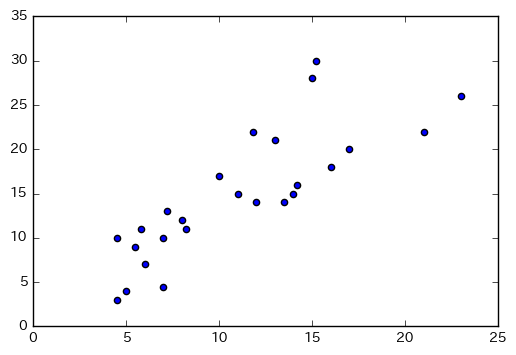

In [3]:
plt.scatter(X, y) #散布図
plt.show() #グラフを表示

部屋の広さが広くなるにつれて賃料が上がっているように見えます。正の相関があります

今回の演習ではデータセットの数はずいぶん少ないためデータの数や性質を一目で把握することができると思います。

では、先ほど用意した** データである $x$ と $y$ それぞれの配列内のデータ数がいくつかあるか数えてみてください。**

## グラフの装飾（Matplotlib）

データの可視化は機械学習の実装において大変重要な作業になります。

実装を進める前にデータセットの性質を把握し、可視化する癖をつけておきましょう。

Matplotlibではエクセルなどで行う作業と同じように、グラフに装飾を施すことができます。

下のセルにMatplotlibを使ったデータを可視化する関数の一例を実装してあります。

コメントアウトした右側にそれぞれの意味を記載しているので、値を変えたりコメントアウトするなどしてグラフの出力結果の違いを体感してみてください。

In [4]:
def plotData(X, y):
    plt.xlim([0,25]) #x軸の範囲を指定
    plt.ylim([0,35]) #y軸の範囲を指定 
    plt.xlabel('部屋の広さ[畳]',fontsize=14) #x軸のラベル
    plt.ylabel('家賃 [万円]', fontsize=14) #y軸のラベル
    plt.title('部屋の広さと賃料の関係', fontsize=16) #グラフのタイトル
    plt.scatter(X, y, c='b') #散布図
    plt.draw() #グラフを表示

いま実装した関数 **plotData(X, y)** を実行すると、グラフが表示されます。

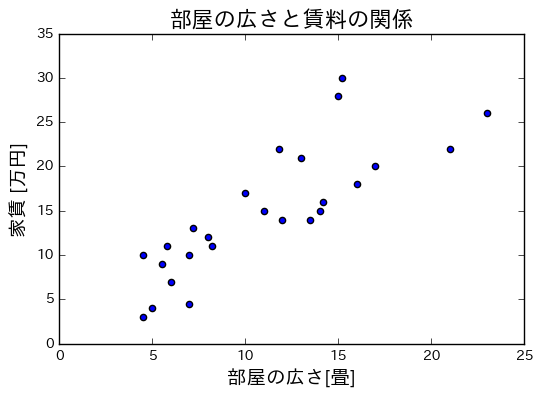

In [5]:
plotData(X, y)

きれいなグラフを表示することができたと思います。

基本的には下の２行でグラフを表示することができますが、ちょっとした装飾テクニックを知っておくと便利です。

```
plt.scatter(X,y)
plt.draw()
```

データの準備も整いました。では、機械学習の実装に入っていきます。

## 仮説と目的関数（コスト関数）の実装

本演習は１変数の線形回帰です。

そして線形回帰の実装には

- パラメータ $\theta_0$, $\theta_1$
- 仮説 $h_{\boldsymbol{\theta}}(x^{(i)})$
- 目的関数 $J(\theta_{0},\theta_{1})$

それぞれ準備する必要がありました。

下の画像にそれぞれの数式の意味を記しています。

<div align="center"  style="width:55%">
<img src="./dataStep2/cost_fun_linear_regression.png"></div>

### 仮説

講義では仮説を、「$h_{\boldsymbol{\theta}}(x^{(i)})$  = $\theta_{0}+\theta_{1}x^{(i)}$」としました。

このように記述すると少し複雑そうに見えてしまいますが、$\theta_{1}$を$a$, $\theta_{0}$を$b$に置き換えてみれば、これは中学数学の授業で慣れ親しんだ $h = aX+b$ の一次関数と全く同じものであるということが分かるでしょう。それでは仮説の式を書いた下のセルを実行してみましょう。

In [6]:
#　パラメータの初期値
a = 0
b = 0

# 仮説
h = a * X + b 

初期のパラメータ $a=0$ と $b=0$のときの仮説の出力を確認します。

In [7]:
h

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

「パラメータを初期化」で $a$ と $b$ をゼロで初期化したため $h = 0\times{x} +0$ となり、出力はすべてゼロとなります。

** 【課題１】 ** 仮説を計算する関数hypothesis(X, a, b)を実装してください。

** Note：**

- $X$：入力データ
- $a,b$：パラメータ

仮説は次のように定義しました。
$$h= aX+b$$

In [8]:
#Coursemale-02 Step2 QuestionNumber1 de0c2d170c0c40867fdffcf13b0f165f
def hypothesis(X, a, b):
###############ここを穴埋めしてください###############
    h = a * X + b
######################################################
    return h

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [9]:
%%bash
./validation_client.py male-02 2 1 Step2_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



いま定義した仮説 hypothesis に入力データ $x$ と初期化した theta を渡し、実行してみましょう。

In [10]:
# パラメータの初期化
a = 0
b = 0

h = hypothesis(X, a, b)
print(h)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


「パラメータを初期化」で $\theta$ をゼロで初期化したため「$0+0\times{x}$」 となり、hypothesis はすべてゼロが出力されました。

** Note： **<br>
<font color='black'>
ここで注意してほしいのは関数の定義<font color='red'>** def hypothesis(X, a, b)**<font color='black'>で出てきた`X, a, b`と、

関数を利用<font color='red'>** h = hypothesis(X, a, b) **<font color='black'>するときに渡した`X, a, b`は字面は同じであっても、違うものであるということです。

** def computeCost(X, a, b) **は引数に対する関数内部での名前であり、** h = hypothesis(X, a, b)**は関数を呼び出したときの変数です。
<br><br>
具体的には以下のような使い方です。もちろん、違う文字（変数）を使うこともできます。

In [11]:
def hoge(fuga):
    return fuga + 1

という関数に対して、

In [12]:
taro = 100
hoge(taro)

101

このように用いることができます。

## 目的関数

線形回帰を行うには、目的関数を使ってコストを計算する必要があります。線形回帰の目的関数は以下のようになります。まず目的関数を計算を行うために必要な演算につてみていきましょう。

線形回帰の目的関数：
$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum^{m}_{i=1}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})^2$$


#### 総和（シグマ）の計算
この目的関数には総和を求める$\sum$が使われています。$\sum$の計算には、Python組み込みのsum、またはNumPyのsumを使うことができます。例えば、「s = np.array([1,2,3]) 」という配列に対して、 ** s.sum() ** や **  np.sum(s) ** と記述すると、合計値である６が出力されます。下のセルを実行して試してみましょう。

In [13]:
s = np.array([1,2,3])
print(s)

[1 2 3]


In [14]:
s.sum() # 1 + 2 + 3

6

np.sum(s)してもs.sum()とまったく同じ結果になります（どちらを使うかは好みの問題です）。

In [15]:
np.sum(s) #s.sum()と同じ

6

#### 累乗の計算

累乗の計算、例えば $2^3$を計算するには下記のようにすれば求まります。

In [16]:
# aのb乗： a**b

2**3

8

2乗の計算をしたい場合は、 np.square() を利用できます。

In [17]:
# aの2乗： np.square(a)

np.square(5) # 5の２乗

25

#### データ数の取得
配列に格納されたデータの個数は **.size** を使えば得られます。

In [18]:
m = y.size 

In [19]:
m

25

## 目的関数の実装

目的関数を計算するために必要な準備ができましたので、実際に目的関数を実装してみましょう。

目的関数：
$$J= \frac{1}{2m}\sum^{m}_{i=1}(h(x^{(i)})-y^{(i)})^2$$

まず、総和（シグマ）の部分を計算してみましょう：

$$\sum^{m}_{i=1}(h(x^{(i)})-y^{(i)})^2$$

この部分は下記のように実装できます

In [20]:
# 総和（シグマ）の部分の計算
np.sum(( h - y ) **2)

6810.25

** 【課題２】 **目的関数の値を計算する関数 computeCost(h, y) を実装してください。

** Note：**

- $h$：仮説（課題１で実装）
- $y$：正解

In [21]:
#Coursemale-02 Step2 QuestionNumber2 f1c666af122ff9212519b5174d383c82
def computeCost(h, y):
    m = y.size #データ数:25
###############ここを穴埋めしてください###############
    J = np.sum((h - y) ** 2)/(2*m)
######################################################
    return J

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [22]:
%%bash
./validation_client.py male-02 2 2 Step2_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



以上で「仮説と目的関数（コスト関数）の実装」はおしまいです。

## パラメータの更新（学習）の式を実装する

### 最急降下法

目的関数（コスト関数）を最小にするために、パラメータを更新し続けるプロセスこそが「学習」です。最急降下法を用いてパラメータを更新する式は以下のように記述できます。パラメータの値があまり変化しなくなるまでパラメータを更新し続ける処理を繰り返します。 ここで、$\alpha$ は学習率であり、パラメータの更新（学習）のスピードを調整します。

$$\theta_0 := \theta_0 - \alpha\frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1)$$
$$\theta_1 := \theta_1 - \alpha\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1)$$


この更新式に先に説明した線形回帰の目的関数$J(\theta_0, \theta_1)$ の $\theta_0$と$\theta_1$を代入すると、次の式になります。

$$\begin{align}\theta_0 &:= \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)}) \\
\theta_1 &:= \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})x^{(i)}\end{align}$$

パラメータ$\theta_0$と$\theta_1$を$a,b$に置き換えると最急降下法の式は以下のように記述できます。

$$\begin{align}a &:= a - \alpha\frac{1}{m}\sum_{i=1}^{m}(h^{(i)}-y^{(i)})x^{(i)} \\
 b &:= b - \alpha\frac{1}{m}\sum_{i=1}^{m}(h^{(i)}-y^{(i)})\end{align}$$

**【課題３】** 最急降下法を用いてパラメータを更新する式を実装してください。

この式は以下のように実装できます。ここでは、学習率 $\alpha$ は$0.01$とします。

In [24]:
#Coursemale-02 Step2 QuestionNumber3 9cf1781b831fc1c307ada1da95173b6d
m = X.size

# パラメータの初期値を設定
a = 0
b = 0

# パラメータを更新（学習）
alpha = 0.01

###############ここを穴埋めしてください###############
a = a - alpha * (1/m) * np.sum((h - y) * X)
b = b - alpha * (1/m) * np.sum((h - y))
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [25]:
%%bash
./validation_client.py male-02 2 3 Step2_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



下のセルの$a,b$を実行すると値が初期値0から変わっている（つまり学習した）ことが分かると思います。つまり、パラメータの値を少し動かすことでコスト関数の出力が小さくなるような値にパラメータが変化したわけです。その様子を実際に確認してみましょう。

In [26]:
# aの値を確認する
a

1.9363599999999999

In [27]:
#　bの値を確認する
b

0.149

更新されたパラメータa, bを使って目的関数computeCost()を使ってコストを計算してみましょう。

In [28]:
#　仮説h
h = a*X + b

cost1 = computeCost(h, y)
print(cost1)

37.48586897551487


上のように最初の一回の学習で計算されたコストと比較するため、パラメータが更新される前（学習前）の値、すなわちパラメータaとbの初期値0を使って目的関数を計算して見ましょう。

In [29]:
h = 0*X + 0  # a = 0, b = 0

cost0 = computeCost(h, y)
print(cost0)

136.205


実際、cost1の方がcost0よりも小さくなっていることを確認してください。目的関数の値、つまり、コストが小さくなったということは、パラメータの値が目的関数を小さくする値に変化したということ、つまり、学習したということになります。仮説hがどのような直線になったのかグラフ化してみれば、どの程度学習できたのか視覚的に確認できます。

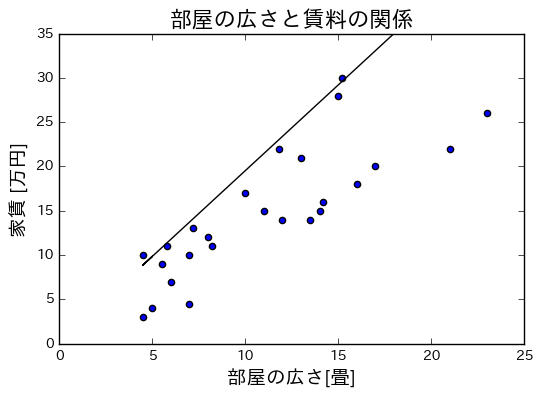

In [30]:
#　仮説h
h = a*X + b

# 仮説hをプロット
plt.xlim([0, 25]) #x軸の範囲を指定
plt.ylim([0, 35]) #y軸の範囲を指定 
plt.xlabel('部屋の広さ[畳]',fontsize=14) #x軸のラベル
plt.ylabel('家賃 [万円]', fontsize=14) #y軸のラベル
plt.title('部屋の広さと賃料の関係', fontsize=16)
plt.scatter(X, y, c='b') #散布図
plt.plot(X, h, c='black') #仮説
plt.show()

一度の更新（学習）だけでは仮説hはまだまだ十分ではないことが分かります。

## 線形回帰の学習

最急降下法では、一度の更新（学習）では不十分であるため、パラメータが更新される度に得られる新しい仮説を使って再びパラメータを更新（学習）するという処理を何度も繰り返すことで、目的関数（コスト関数）の値を小さくしていきます。つまり、下記のような処理を繰り返すことで仮説の精度を上げます。

仮説(最初の仮説)<br>
パラメータの更新<br>
仮説(新しい仮説)<br>
パラメータの更新<br>
仮説(新しい仮説)<br>
パラメータの更新<br>
仮説(新しい仮説)<br>
パラメータの更新<br>
・<br>
・<br>
・<br>

上記のように同じ処理を何度も繰りを返す場合は for文を使うと便利です。

下に簡単なfor文を作ってみたので、実行してみてください。この例では、range()で指定した繰り返し回数分（今回は５回） print文 を実行します。

In [31]:
for i in range(5):
    print(i)

0
1
2
3
4


「仮説」、「パラメータの更新」の繰り返しを実装してみましょう。ただし、「仮説」と「パラメータの更新」との間に「目的関数（コスト関数）」の計算を挟むことで、目的関数の値が下がっていること、つまり、コストが下がっていることを後でグラフ化して確認できるようにします。コストが下がっていなければ何かしら間違えたことをしていることになるので、コストの変化を視覚的に確認することは学習が正しく行われているかどうかを知る大きな助けになります。

学習の繰り返しは下記のように実装できます。コードを実行してみましょう。

**下のセルの実行結果を【課題４】で使用します。**

1.1579791016052015
2.143702216717079


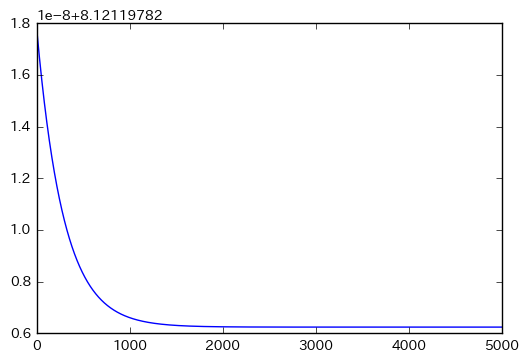

In [32]:
m = X.size
cost = []

#学習率
alpha = 0.01

#パラメータの初期化
a = 0
b = 0

for i in range(100000):
    #仮説の計算
    h = a * X + b

    #目的関数（コスト関数）の値を記録
    cost.append(1 / (2*m) * np.sum((h - y)**2))
    
    #パラメータの更新(学習) 
    a = a - alpha/m * np.sum((h - y)*X)
    b = b - alpha/m * np.sum(h - y)

plt.plot(cost[5000:10000])
print(a)
print(b)

目的関数（コスト関数）の値が下がり切って、値がほとんど変化しなくなっていれば学習は終了したと判断できます。この例では約2000回の繰り返しで値が収束していることが分かるでしょう。<br>
学習結果を視覚的に確認するために、データと一緒に仮説hをプロットしてみましょう。

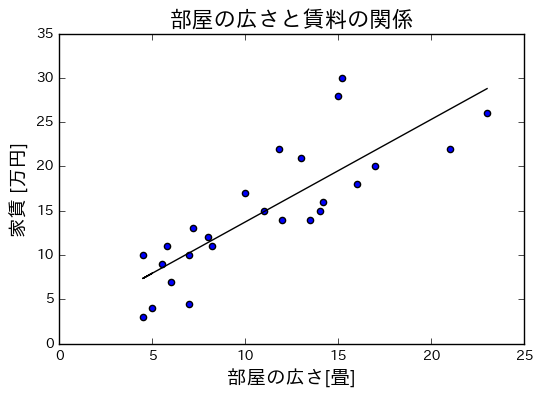

In [33]:
#　仮説h
h = a * X + b

# 仮説hをプロット
plt.xlim([0, 25]) #x軸の範囲を指定
plt.ylim([0, 35]) #y軸の範囲を指定 
plt.xlabel('部屋の広さ[畳]',fontsize=14) #x軸のラベル
plt.ylabel('家賃 [万円]', fontsize=14) #y軸のラベル
plt.title('部屋の広さと賃料の関係', fontsize=16)
plt.scatter(X, y, c='b') #散布図
plt.plot(X, h, c='black') #仮説
plt.show()

十分な学習の後に得られた仮説hは、データのばらつき代表するような直線になっていることが分かります。

## 賃料の相場を予測してみる

学習済みのモデルを使って賃料を予測する関数predict() を作ってみましょう。

** 【課題４】 ** 賃料を予測する関数predict(X) を実装し、賃料の予測値を返す関数を実装してください。

**Note：**
- X（入力データ）：predict関数の引数
- a：学習済みのパラメータaの値を小数点５桁まで（小数点6桁以上は切り捨て、わからない場合はヒントを参考にしてください。）
- b：学習済みのパラメータbの値を小数点５桁まで（小数点6桁以上は切り捨て、わからない場合はヒントを参考にしてください。）

In [35]:
#Coursemale-02 Step2 QuestionNumber4 9043eb6c27a8c175365871dde165d5db
def predict(X):
###############ここを穴埋めしてください###############
    a = 1.15797
    b = 2.14370
    h = a * X + b
######################################################
    return h

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [36]:
%%bash
./validation_client.py male-02 2 4 Step2_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



In [37]:
predict(15)

19.51325

下のセルの size = ** None** の部分に任意の整数（部屋の広さ[畳]）を記入後、セルを実行してください。

predict()関数が賃料の相場を予測し、出力がでてきます。

出力結果をみて上のグラフの決定境界の位置と相場の関係を見比べてみてください。きちんと予測することができているはずです。

In [39]:
size = 5
price = predict(size)
print("部屋の広さ{}畳の賃料の相場は{:.2f}万円".format(size, price))

部屋の広さ5畳の賃料の相場は7.93万円


## おつかれさまでした

以上で線形回帰の基礎おしまいです。

連続値のデータを使った教師あり学習の一つの手法である線形回帰を体験してもらいました。

最後に本演習で行なったことを簡単に振り返ります。

- パラメータの初期化
- 仮説を定義
- 目的関数
- 最急降下法

主に上記の4つのテクニックや手法を用いて機械学習の実装をおこないました。

ライブラリを使わずにゼロから機械学習を実装したことは自信をもってください。

次の演習ではまた違ったテクニックを使って線形回帰のモデルの実装を行います。

おつかれさまでした。